# importation du jeu de données

In [2]:
%matplotlib inline
import seaborn as sns
import pandas
import pandas as pd
import csv
import numpy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score


In [3]:
df=pd.read_csv('insertion_professionnelle.csv',sep=";")
df1=df [(df.annee == 2013) & (df.academie =="Paris") | (df.academie =="Créteil") | (df.academie =="Versailles")]

In [4]:
df1.head()

annee     diplome numero_de_l_etablissement                etablissement  \
444   2013  MASTER LMD                  0750736T             Paris - Dauphine   
445   2013  MASTER LMD                  0750736T             Paris - Dauphine   
446   2013  MASTER LMD                  0751717J  Paris 1 - Panthéon Sorbonne   
447   2013  MASTER LMD                  0751717J  Paris 1 - Panthéon Sorbonne   
448   2013  MASTER LMD                  0751717J  Paris 1 - Panthéon Sorbonne   

    code_de_l_academie academie code_du_domaine  \
444                A01    Paris             DEG   
445                A01    Paris             STS   
446                A01    Paris             DEG   
447                A01    Paris             LLA   
448                A01    Paris             SHS   

                             domaine code_de_la_discipline  \
444       Droit, économie et gestion                disc01   
445  Sciences, technologies et santé                disc16   
446       Droit, économie et gestion                disc05   
447           Lettres, langues, arts                disc06   
448    Sciences humaines et sociales                disc10   

                                            discipline    ...      \
444  Ensemble formations juridiques, économiques et...    ...       
445                                       Informatique    ...       
446  Autres formations juridiques, économiques et d...    ...       
447                             Lettres, langues, arts    ...       
448                          Information communication    ...       

    de_diplomes_boursiers taux_de_chomage_regional  \
444                  29.0                      8.8   
445                  29.0                      8.8   
446                  21.0                      8.8   
447                  21.0                      8.8   
448                  21.0                      8.8   

     salaire_net_mensuel_median_regional  emplois_cadre  \
444                                 2070            NaN   
445                                 2070            NaN   
446                                 2070             58   
447                                 2070             34   
448                                 2070             ns   

    emplois_exterieurs_a_la_region_de_luniversite femmes  \
444                                           NaN    NaN   
445                                           NaN    NaN   
446                                            24     69   
447                                            28     85   
448                                            ns     ns   

    salaire_net_mensuel_regional_1er_quartile  \
444                                      1630   
445                                      1630   
446                                      1630   
447                                      1630   
448                                      1630   

    salaire_net_mensuel_regional_3eme_quartile  \
444                                       2580   
445                                       2580   
446                                       2580   
447                                       2580   
448                                       2580   

                           cle_etab   cle_disc  
444             Paris - Dauphine_30  disc01_30  
445             Paris - Dauphine_30  disc16_30  
446  Paris 1 - Panthéon Sorbonne_18  disc05_18  
447  Paris 1 - Panthéon Sorbonne_18  disc06_18  
448  Paris 1 - Panthéon Sorbonne_18  disc10_18  

[5 rows x 31 columns]

In [4]:
#La commande .info() permet d'afficher le type de nos données 
#(catagorielle ou continue)
# Object signifie string, donc par forcément catégorielle.
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 189 to 5998
Data columns (total 31 columns):
annee                                            976 non-null int64
diplome                                          976 non-null object
numero_de_l_etablissement                        976 non-null object
etablissement                                    976 non-null object
code_de_l_academie                               976 non-null object
academie                                         976 non-null object
code_du_domaine                                  976 non-null object
domaine                                          976 non-null object
code_de_la_discipline                            976 non-null object
discipline                                       976 non-null object
situation                                        976 non-null object
remarque                                         150 non-null object
nombre_de_reponses                               972 non-null flo

In [7]:
# transformation de la base de données
df12=df1.copy()
df12.index=np.array(df12.cle_etab +" "+ df12.code_du_domaine)
df12.drop(['etablissement','code_du_domaine', 'discipline', 'situation','annee',
           'diplome','numero_de_l_etablissement',
          'code_de_l_academie','academie','domaine','code_de_la_discipline',
          'remarque','poids_de_la_discipline','cle_etab',
          'cle_disc'],axis=1,inplace=True)

In [8]:
df12.head(n=1)

nombre_de_reponses  taux_de_reponse  \
Paris-Est Marne-la-Vallée_30 DEG                12.0             81.0   

                                 taux_dinsertion  \
Paris-Est Marne-la-Vallée_30 DEG              ns   

                                 emplois_cadre_ou_professions_intermediaires  \
Paris-Est Marne-la-Vallée_30 DEG                                          ns   

                                 emplois_stables emplois_a_temps_plein  \
Paris-Est Marne-la-Vallée_30 DEG              ns                    ns   

                                 salaire_net_median_des_emplois_a_temps_plein  \
Paris-Est Marne-la-Vallée_30 DEG                                           ns   

                                  salaire_brut_annuel_estime  \
Paris-Est Marne-la-Vallée_30 DEG                         NaN   

                                  de_diplomes_boursiers  \
Paris-Est Marne-la-Vallée_30 DEG                   12.0   

                                 taux_de_chomage_regional  \
Paris-Est Marne-la-Vallée_30 DEG                        9   

                                 salaire_net_mensuel_median_regional  \
Paris-Est Marne-la-Vallée_30 DEG                                2020   

                                 emplois_cadre  \
Paris-Est Marne-la-Vallée_30 DEG            ns   

                                 emplois_exterieurs_a_la_region_de_luniversite  \
Paris-Est Marne-la-Vallée_30 DEG                                            ns   

                                 femmes  \
Paris-Est Marne-la-Vallée_30 DEG     ns   

                                 salaire_net_mensuel_regional_1er_quartile  \
Paris-Est Marne-la-Vallée_30 DEG                                      1580   

                                 salaire_net_mensuel_regional_3eme_quartile  
Paris-Est Marne-la-Vallée_30 DEG                                       2530

# nettoyage des données

In [9]:
""" Nettoyage """

def is_number(s):
    try:
        t=float(s)
        return t
    except ValueError:
        return 0

def net_donnee(A):
    for i in A.columns:
        j1=np.array(A[i])
        for k in range(len(j1)):
            if 'ns'==j1[k] #ns non taux d insertion non significatif
                A[i][k]=25 #  un taux d'insertion < à 30 on le fixe à 25
            elif 'nd'==j1[k]:
                A[i][k]=0  # nd non repondant 
    return A

tab = net_donnee(df12)
tab = tab.fillna(tab.median())


C:\Users\ayadm\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\ayadm\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
# changement du type des variables
for k in tab.columns:
    if k not in ['nombre_de_reponses','taux_de_reponse','salaire_brut_annuel_estime' ]:
        tab[k]=tab[k].astype("float64")

In [11]:
# Vérification 
tab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, Paris-Est Marne-la-Vallée_30 DEG to Cergy-Pontoise_30 STS
Data columns (total 16 columns):
nombre_de_reponses                               972 non-null float64
taux_de_reponse                                  938 non-null float64
taux_dinsertion                                  960 non-null float64
emplois_cadre_ou_professions_intermediaires      960 non-null float64
emplois_stables                                  960 non-null float64
emplois_a_temps_plein                            960 non-null float64
salaire_net_median_des_emplois_a_temps_plein     960 non-null float64
salaire_brut_annuel_estime                       340 non-null float64
de_diplomes_boursiers                            950 non-null float64
taux_de_chomage_regional                         976 non-null float64
salaire_net_mensuel_median_regional              976 non-null float64
emplois_cadre                                    960 non-null float64
emplois_ext

In [12]:
# Regardons les NA
def Missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print(missing_data[(percent>0)],'\n')
Missing_values(tab)

                                               Total  Pourcentage
salaire_brut_annuel_estime                       636     0.651639
salaire_net_mensuel_regional_3eme_quartile       272     0.278689
salaire_net_mensuel_regional_1er_quartile        272     0.278689
taux_de_reponse                                   38     0.038934
de_diplomes_boursiers                             26     0.026639
emplois_exterieurs_a_la_region_de_luniversite     18     0.018443
femmes                                            16     0.016393
emplois_cadre                                     16     0.016393
salaire_net_median_des_emplois_a_temps_plein      16     0.016393
emplois_a_temps_plein                             16     0.016393
emplois_stables                                   16     0.016393
emplois_cadre_ou_professions_intermediaires       16     0.016393
taux_dinsertion                                   16     0.016393
nombre_de_reponses                                 4     0.004098 



In [13]:
tab.head(n=3)

nombre_de_reponses  \
Paris-Est Marne-la-Vallée_30 DEG                           12.0   
Paris-Est Marne-la-Vallée_30 SHS                           88.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG               271.0   

                                             taux_de_reponse  taux_dinsertion  \
Paris-Est Marne-la-Vallée_30 DEG                        81.0             25.0   
Paris-Est Marne-la-Vallée_30 SHS                        78.0             91.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG             60.0             89.0   

                                             emplois_cadre_ou_professions_intermediaires  \
Paris-Est Marne-la-Vallée_30 DEG                                                    25.0   
Paris-Est Marne-la-Vallée_30 SHS                                                    94.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG                                         87.0   

                                             emplois_stables  \
Paris-Est Marne-la-Vallée_30 DEG                        25.0   
Paris-Est Marne-la-Vallée_30 SHS                        55.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG             71.0   

                                             emplois_a_temps_plein  \
Paris-Est Marne-la-Vallée_30 DEG                              25.0   
Paris-Est Marne-la-Vallée_30 SHS                              99.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG                   98.0   

                                             salaire_net_median_des_emplois_a_temps_plein  \
Paris-Est Marne-la-Vallée_30 DEG                                                     25.0   
Paris-Est Marne-la-Vallée_30 SHS                                                   2040.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG                                        2000.0   

                                             salaire_brut_annuel_estime  \
Paris-Est Marne-la-Vallée_30 DEG                                    NaN   
Paris-Est Marne-la-Vallée_30 SHS                                31700.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG                     31200.0   

                                             de_diplomes_boursiers  \
Paris-Est Marne-la-Vallée_30 DEG                              12.0   
Paris-Est Marne-la-Vallée_30 SHS                              12.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG                   11.0   

                                             taux_de_chomage_regional  \
Paris-Est Marne-la-Vallée_30 DEG                                  9.0   
Paris-Est Marne-la-Vallée_30 SHS                                  9.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG                       9.0   

                                             salaire_net_mensuel_median_regional  \
Paris-Est Marne-la-Vallée_30 DEG                                          2020.0   
Paris-Est Marne-la-Vallée_30 SHS                                          2020.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG                               2020.0   

                                             emplois_cadre  \
Paris-Est Marne-la-Vallée_30 DEG                      25.0   
Paris-Est Marne-la-Vallée_30 SHS                      76.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG           61.0   

                                             emplois_exterieurs_a_la_region_de_luniversite  \
Paris-Est Marne-la-Vallée_30 DEG                                                      25.0   
Paris-Est Marne-la-Vallée_30 SHS                                                      22.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG                                           21.0   

                                             femmes  \
Paris-Est Marne-la-Vallée_30 DEG               25.0   
Paris-Est Marne-la-Vallée_30 SHS               55.0   
Versailles Saint-Quentin-en-Yvelines_30 DEG    69.0   

                                             salaire_net_mensuel_regional_1er_quartile  \
Paris-Est Marne-la-Val

# imputation des valeurs manquantes

In [14]:
l=['salaire_brut_annuel_estime','salaire_net_mensuel_regional_3eme_quartile','salaire_net_mensuel_regional_1er_quartile',
  'taux_de_reponse','de_diplomes_boursiers','emplois_exterieurs_a_la_region_de_luniversite','femme','emploi_cadre',
  'salaire_net_median_des_emplois_a_temps_plein','emplois_satble','emplois_cadre_ou_professions_intermediares',
  'taux_dinsertion','nombre_de_reponse']
tab=tab.fillna(tab.median())
Missing_values(tab)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



In [38]:
tab.describe()

nombre_de_reponses  taux_de_reponse  taux_dinsertion  \
count          976.000000       976.000000       976.000000   
mean            52.448560        62.037313        57.248958   
std             63.325682        14.563167        32.939439   
min              0.000000         0.000000         0.000000   
25%             12.000000        54.000000        25.000000   
50%             30.000000        63.000000        69.500000   
75%             68.000000        71.000000        90.000000   
max            531.000000       100.000000       100.000000   

       emplois_cadre_ou_professions_intermediaires  emplois_stables  \
count                                   976.000000       976.000000   
mean                                     51.825000        45.765625   
std                                      32.519511        26.570859   
min                                       0.000000         0.000000   
25%                                      25.000000        25.000000   
50%                                      25.000000        25.000000   
75%                                      88.000000        71.000000   
max                                     100.000000       100.000000   

       emplois_a_temps_plein  salaire_net_median_des_emplois_a_temps_plein  \
count             976.000000                                    976.000000   
mean               54.680208                                    726.760417   
std                35.161150                                    952.464455   
min                 0.000000                                      0.000000   
25%                25.000000                                     25.000000   
50%                25.000000                                     25.000000   
75%                96.000000                                   1850.000000   
max               100.000000                                   2540.000000   

       salaire_brut_annuel_estime  taux_de_chomage_regional  \
count                  976.000000                976.000000   
mean                 31333.235294                  8.826434   
std                   2163.888817                  0.129686   
min                  23400.000000                  8.600000   
25%                  31333.235294                  8.800000   
50%                  31333.235294                  8.800000   
75%                  31333.235294                  9.000000   
max                  39600.000000                  9.000000   

       salaire_net_mensuel_median_regional  emplois_cadre  \
count                           976.000000     976.000000   
mean                           2032.971311      37.809375   
std                              35.959852      27.480195   
min                            1780.000000       0.000000   
25%                            1990.000000      25.000000   
50%                            2020.000000      25.000000   
75%                            2070.000000      64.000000   
max                            2070.000000     100.000000   

       emplois_exterieurs_a_la_region_de_luniversite      femmes  \
count                                     976.000000  976.000000   
mean                                       18.884134   38.108333   
std                                        10.226769   26.667501   
min                                         0.000000    0.000000   
25%                                        12.000000   25.000000   
50%                                        25.000000   25.000000   
75%                                        25.000000   62.000000   
max                                        55.000000   95.000000   

       salaire_net_mensuel_regional_1er_quartile  \
count                                 976.000000   
mean                                 1609.829545   
std                                    22.270586   
min                                  1430.000000   
25%                                  1580.000000   
50%                                  1609.829545   
7

In [28]:
#coefficirnt de corrélation de varoable
tab.ix[:,].corr().round(2)

nombre_de_reponses  \
nombre_de_reponses                                           1.00   
taux_de_reponse                                              0.08   
taux_dinsertion                                              0.59   
emplois_cadre_ou_professions_intermediaires                  0.65   
emplois_stables                                              0.60   
emplois_a_temps_plein                                        0.66   
salaire_net_median_des_emplois_a_temps_plein                 0.71   
salaire_brut_annuel_estime                                   0.06   
taux_de_chomage_regional                                     0.00   
salaire_net_mensuel_median_regional                          0.05   
emplois_cadre                                                0.50   
emplois_exterieurs_a_la_region_de_luniversite               -0.13   
femmes                                                       0.41   
salaire_net_mensuel_regional_1er_quartile                    0.03   
salaire_net_mensuel_regional_3eme_quartile                   0.04   

                                               taux_de_reponse  \
nombre_de_reponses                                        0.08   
taux_de_reponse                                           1.00   
taux_dinsertion                                           0.08   
emplois_cadre_ou_professions_intermediaires               0.07   
emplois_stables                                           0.06   
emplois_a_temps_plein                                     0.07   
salaire_net_median_des_emplois_a_temps_plein              0.09   
salaire_brut_annuel_estime                               -0.04   
taux_de_chomage_regional                                  0.05   
salaire_net_mensuel_median_regional                       0.02   
emplois_cadre                                             0.04   
emplois_exterieurs_a_la_region_de_luniversite             0.08   
femmes                                                    0.04   
salaire_net_mensuel_regional_1er_quartile                -0.06   
salaire_net_mensuel_regional_3eme_quartile               -0.05   

                                               taux_dinsertion  \
nombre_de_reponses                                        0.59   
taux_de_reponse                                           0.08   
taux_dinsertion                                           1.00   
emplois_cadre_ou_professions_intermediaires               0.85   
emplois_stables                                           0.84   
emplois_a_temps_plein                                     0.86   
salaire_net_median_des_emplois_a_temps_plein              0.70   
salaire_brut_annuel_estime                                0.02   
taux_de_chomage_regional                                 -0.01   
salaire_net_mensuel_median_regional                       0.07   
emplois_cadre                                             0.63   
emplois_exterieurs_a_la_region_de_luniversite            -0.11   
femmes                                                    0.60   
salaire_net_mensuel_regional_1er_quartile                 0.06   
salaire_net_mensuel_regional_3eme_quartile                0.06   

                                               emplois_cadre_ou_professions_intermediaires  \
nombre_de_reponses                                                                    0.65   
taux_de_reponse                                                                       0.07   
taux_dinsertion                                                                       0.85   
emplois_cadre_ou_professions_intermediaires                                           1.00   
emplois_stables                                                                       0.91   
emplois_a_temps_plein                                                                 0.95   
salaire_net_median_des_emplois_a_temps_plein                                          0.82   
salaire_brut_annuel_estime                                                  

# visualisation des données

Axes(0.125,0.125;0.62x0.755)


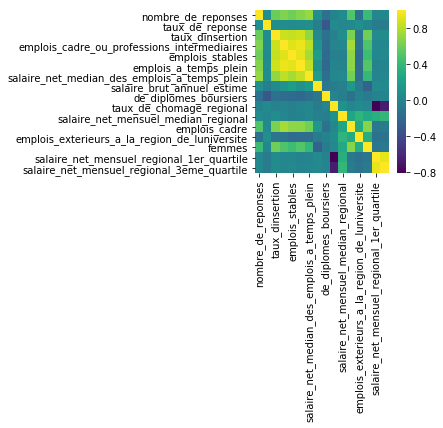

In [85]:
#on voit qu on a beaucoup de valeurs manquantes
mat=tab.copy()
plt.figure(figsize=(3,3))
corr = mat.corr()
print(sns.heatmap(corr,cmap='viridis'))

In [113]:
#décomposition su jeu de doànnées en train et test
y=tab["taux_dinsertion"]
X_train, X_test, y_train, y_test = train_test_split(tab, y, test_size=0.30, random_state=42)
del X_train["taux_dinsertion"]
del X_test["taux_dinsertion"]

In [93]:
#print(tab.describe())
print(X_train.describe())

       nombre_de_reponses  taux_de_reponse  \
count          683.000000       683.000000   
mean            52.884334        62.572474   
std             63.574925        14.297999   
min              0.000000         0.000000   
25%             12.500000        54.000000   
50%             31.000000        63.000000   
75%             73.000000        71.000000   
max            531.000000       100.000000   

       emplois_cadre_ou_professions_intermediaires  emplois_stables  \
count                                   683.000000       683.000000   
mean                                     52.114202        46.051245   
std                                      32.782968        26.798893   
min                                       0.000000         0.000000   
25%                                      25.000000        25.000000   
50%                                      25.000000        25.000000   
75%                                      88.000000        73.000000   
max              

Axes(0.125,0.125;0.62x0.755)


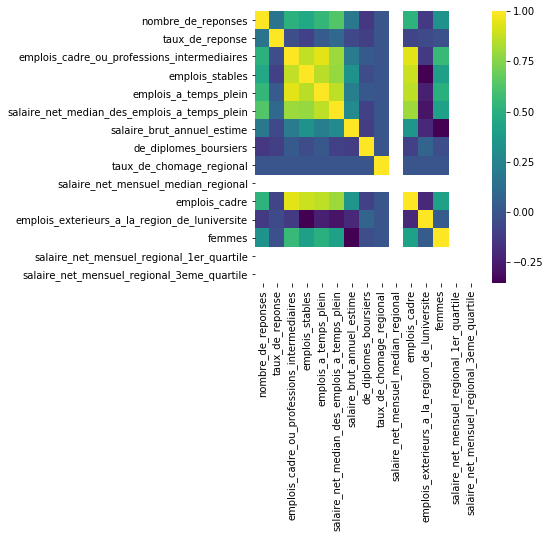

In [38]:
#matrice de corrélation
mat_corr=X_train.copy()
plt.figure(figsize=(5,5))
corr = mat_corr.corr()
print(sns.heatmap(corr,cmap='viridis'))

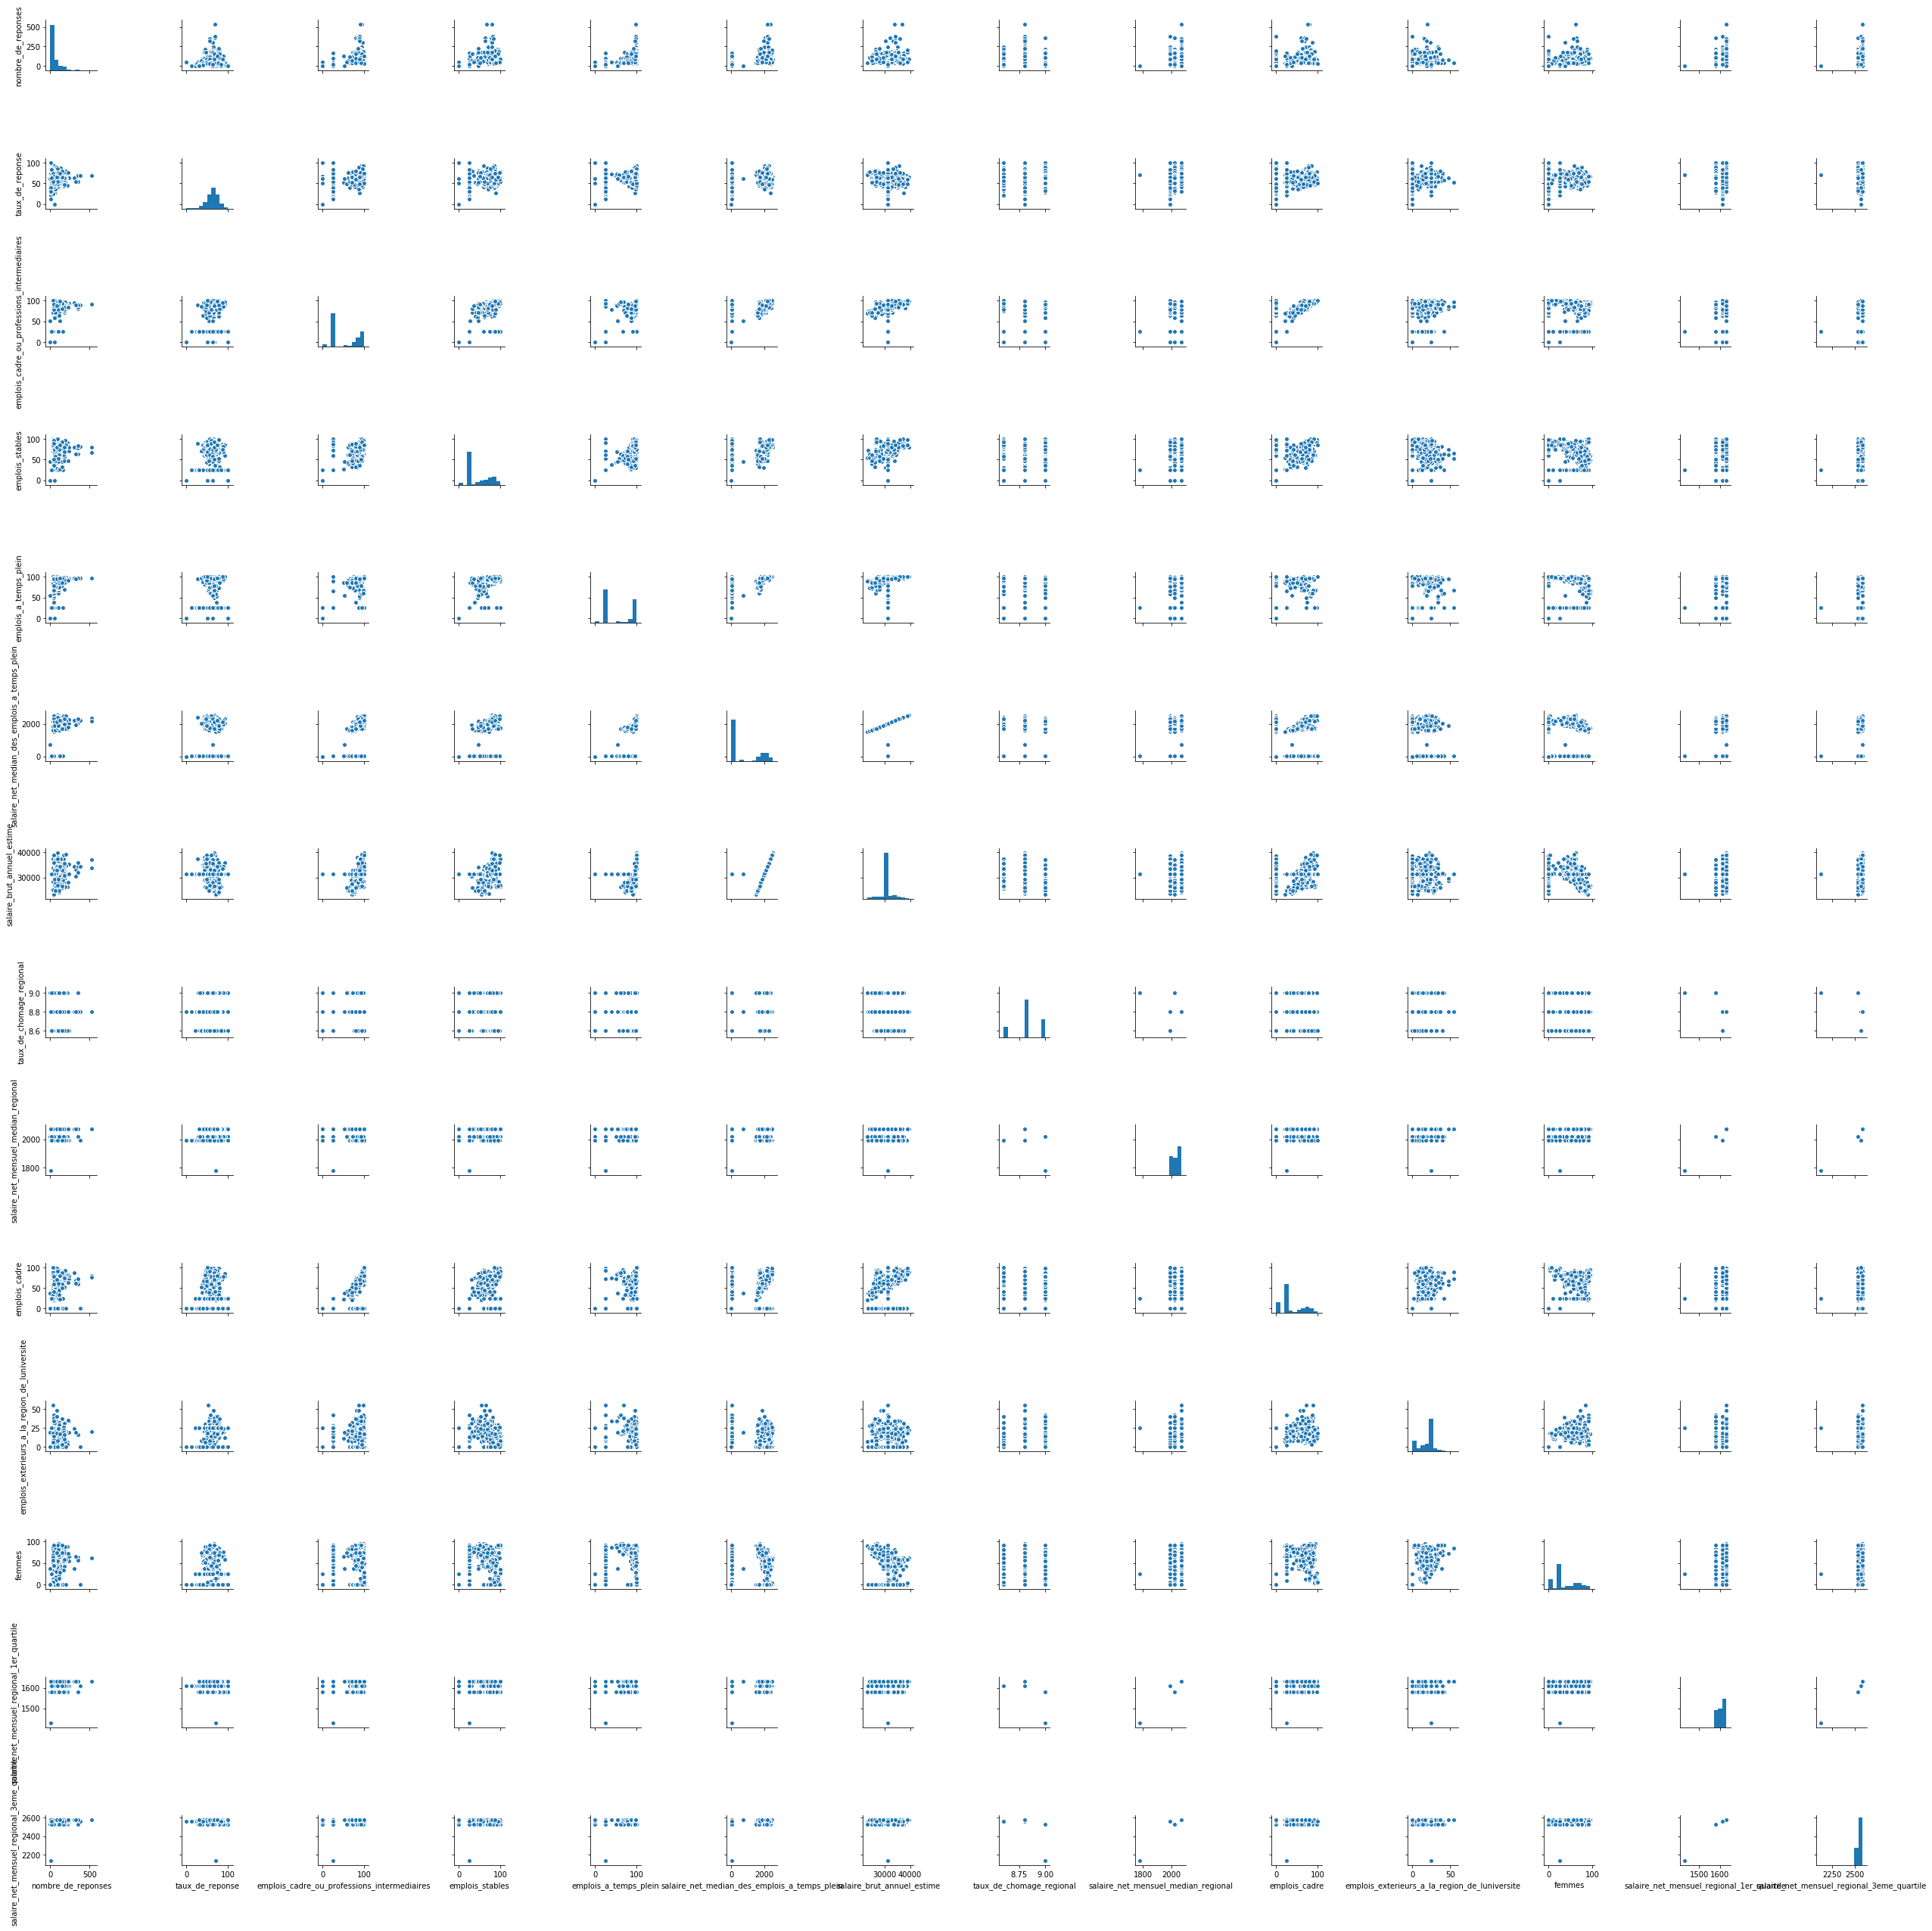

In [48]:
sns.pairplot(X_train,vars=X_train.columns)

In [56]:
X_train.columns

Index(['nombre_de_reponses', 'taux_de_reponse',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers',
       'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes', 'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile'],
      dtype='object')

(array([  80.,  163.,  276.,  132.,   30.,    0.,    0.,    0.,    0.,    2.]),
 array([  7.,  13.,  19.,  25.,  31.,  37.,  43.,  49.,  55.,  61.,  67.]),
 <a list of 10 Patch objects>)

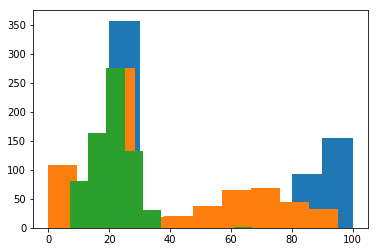

In [62]:
#distribution des variables
plt.hist(np.array(X_train['emplois_cadre_ou_professions_intermediaires']))
plt.hist(np.array(X_train['femmes']))
plt.hist(np.array(X_train['de_diplomes_boursiers']))

(array([   2.,    0.,    0.,    0.,    0.,    0.,    0.,  182.,    0.,  499.]),
 array([ 1430.,  1450.,  1470.,  1490.,  1510.,  1530.,  1550.,  1570.,
         1590.,  1610.,  1630.]),
 <a list of 10 Patch objects>)

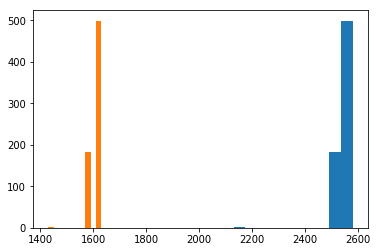

In [63]:
plt.hist(np.array(X_train['salaire_net_mensuel_regional_3eme_quartile']))
plt.hist(np.array(X_train['salaire_net_mensuel_regional_1er_quartile']))

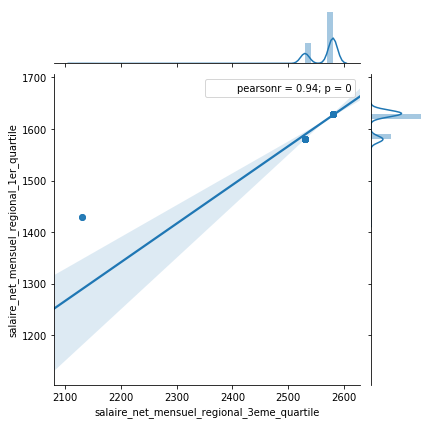

In [64]:
#étude de la corrélation des variables
sns.jointplot("salaire_net_mensuel_regional_3eme_quartile",
"salaire_net_mensuel_regional_1er_quartile", data=tab,kind="reg")

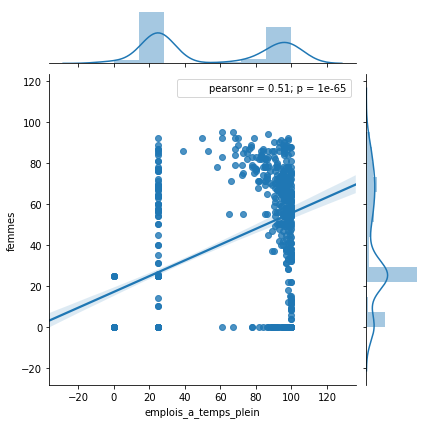

In [69]:
sns.jointplot("emplois_a_temps_plein", "femmes", data=tab,kind="reg")

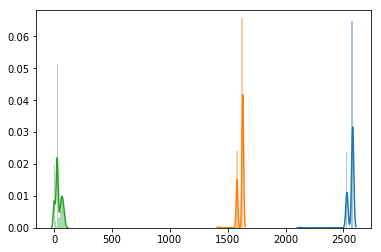

In [72]:
sns.distplot(np.array(X_train['salaire_net_mensuel_regional_3eme_quartile']))
sns.distplot(np.array(X_train['salaire_net_mensuel_regional_1er_quartile']))
sns.distplot(np.array(X_train['femmes']))
plt.figure()

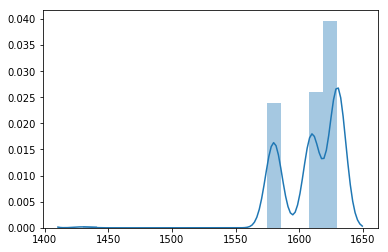

In [61]:
sns.distplot(np.array(X_train['salaire_net_mensuel_regional_1er_quartile']))
plt.figure()

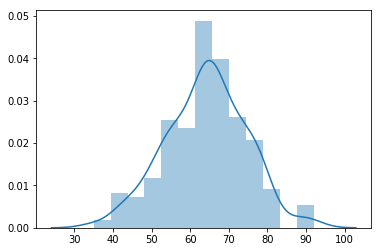

In [204]:
sns.distplot(np.array(tab['taux_de_reponse']))
plt.figure()

In [110]:
clf = RandomForestRegressor(max_depth=11, random_state=0)
clf.fit(X_train, y_train)
selec = clf.feature_importances_
var_select = [X_train.columns[k] for k in range(len(selec)) if selec[k] !=0]
X_train_selecte = X_train[var_select]
X_test_selecte = X_test[var_select]
clf.fit(X_train_selecte,y_train)
pred = clf.predict(X_test_selecte)
print("le scor vaut",explained_variance_score(y_test,pred))

le scor vaut 0.955226687408


# ACP

In [121]:

class projet:
    def __init__(self,df):
        """construiction du modèle avec les variable explicative et quantitative"""
        self._df=(df - df.mean())/df.std()
        #self._matrice_cov=matrice_cov

    def matrice_cov(self):#matrice de covariance
        pca=PCA()                    
        print(pca.fit(self._df))
        # Estimation, calcul des composantes principales : matrice de covariance
        comp_princ=pca.explained_variance_ratio_   
        return comp_princ
    
    def df(self):#la jeu de données
        #accesseur pour le model
        return self._df
    
    def matrice_covariance(self):#matrice de covariance
        #accesseur pour la matrice de cova
        return self._matrice_cov
    
    
    #Diagramme boîte des premières composantes principales.
    #en param on donne la matrice de covarience
    def repr_vp(self):#representation de valeurs propres
        pca=PCA()                    
        print(pca.fit(self._df))
        # Estimation, calcul des composantes principales : matrice de covariance
        comp_princ=pca.explained_variance_ratio_  
        plt.bar(numpy.arange(len( comp_princ))+0.5,  comp_princ)
        plt.title("Variance expliquée")
        
    #Diagramme boîte des premières composantes principales.
    #en param on donne le modèle (dataframe)
    
    def myPCA(self):#utilisation de l acp sur le jeu de données
        # Normalize data
        #df0 = self._df
        #df_norm = (df0 - df0.mean()) / df0.std()
        #df0 = self._df
        #df_norm = (df0 - df0.mean())
        # PCA
        #df_norm = self._df
        pca = PCA()
        pca_res = pca.fit_transform(self._df)
        # Ebouli
        ebouli = pd.Series(pca.explained_variance_ratio_)
        coef = np.transpose(pca.components_)
        cols = ['PC-'+str(x) for x in range(len(ebouli))]
        pc_infos = pd.DataFrame(coef, columns=cols, index=self._df.columns)
        return pc_infos, ebouli  

    def circleOfCorrelations(pc_infos, ebouli):#cercle de correlation
        plt.Circle((0,0),radius=10, color='g', fill=False)
        circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
        fig = plt.gcf()
        fig.gca().add_artist(circle1)
        for idx in range(len(pc_infos["PC-0"])):
            x = pc_infos["PC-0"][idx]
            y = pc_infos["PC-1"][idx]
            plt.plot([0.0,x],[0.0,y],'k-')
            plt.plot(x, y, 'rx')
            plt.annotate(pc_infos.index[idx], xy=(x,y))
        plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
        plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
        plt.xlim((-1,1))
        plt.ylim((-1,1))
        plt.title("Circle of Correlations")
    
    def boit_npre_comp(self):#reprentation des valeurs propre en diagrame en baton
        pca = PCA()
        c=pca.fit(self._df).transform(self._df)
        plt.boxplot(c[:,0:20])
        
#On affiche les fac dans le plan des deux premiers axes :
#en param on lui donne le modèle (datafram)            

    def repr_obs_plan(self):#representation des individu
       X_reduced = pca.transform(self._df)
       plt.figure(figsize=(90,90))
       plt.scatter(X_reduced[:, 0], X_reduced[:, 2])
       for label, x, y in zip(self._df.index, X_reduced[:, 0],  X_reduced[:, 2]):
          plt.annotate(label,xy = (x, y), xytext = (-0.5, 0.5),
          textcoords = 'offset points', ha = 'left', va = 'center',
          bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
          arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        
def repr_obs_plan(l):#representation des individu
       X_reduced = pca.transform(l)
       plt.figure(figsize=(90,90))
       plt.scatter(X_reduced[:, 0], X_reduced[:, 2])
       for label, x, y in zip(l.index, X_reduced[:, 0],  X_reduced[:, 2]):
          plt.annotate(label,xy = (x, y), xytext = (-0.5, 0.5),
          textcoords = 'offset points', ha = 'left', va = 'center',
          bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
          arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

def circleOfCorrelations(pc_infos, ebouli):#cercle de correlation
        plt.Circle((0,0),radius=5000, color='g', fill=False)
        circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
        fig = plt.gcf()
        fig.gca().add_artist(circle1)
        for idx in range(len(pc_infos["PC-0"])):
            x = pc_infos["PC-0"][idx]
            y = pc_infos["PC-1"][idx]
            plt.plot([0.0,x],[0.0,y],'k-')
            plt.plot(x, y, 'rx')
            plt.annotate(pc_infos.index[idx], xy=(x,y))
        plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
        plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
        plt.xlim((-1,1))
        plt.ylim((-1,1))
        plt.title("Circle of Correlations")

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


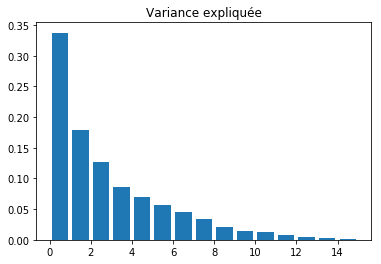

In [118]:
pca=PCA()                    
acp = pca.fit(X_train)
t = projet(X_train)
t.repr_vp()

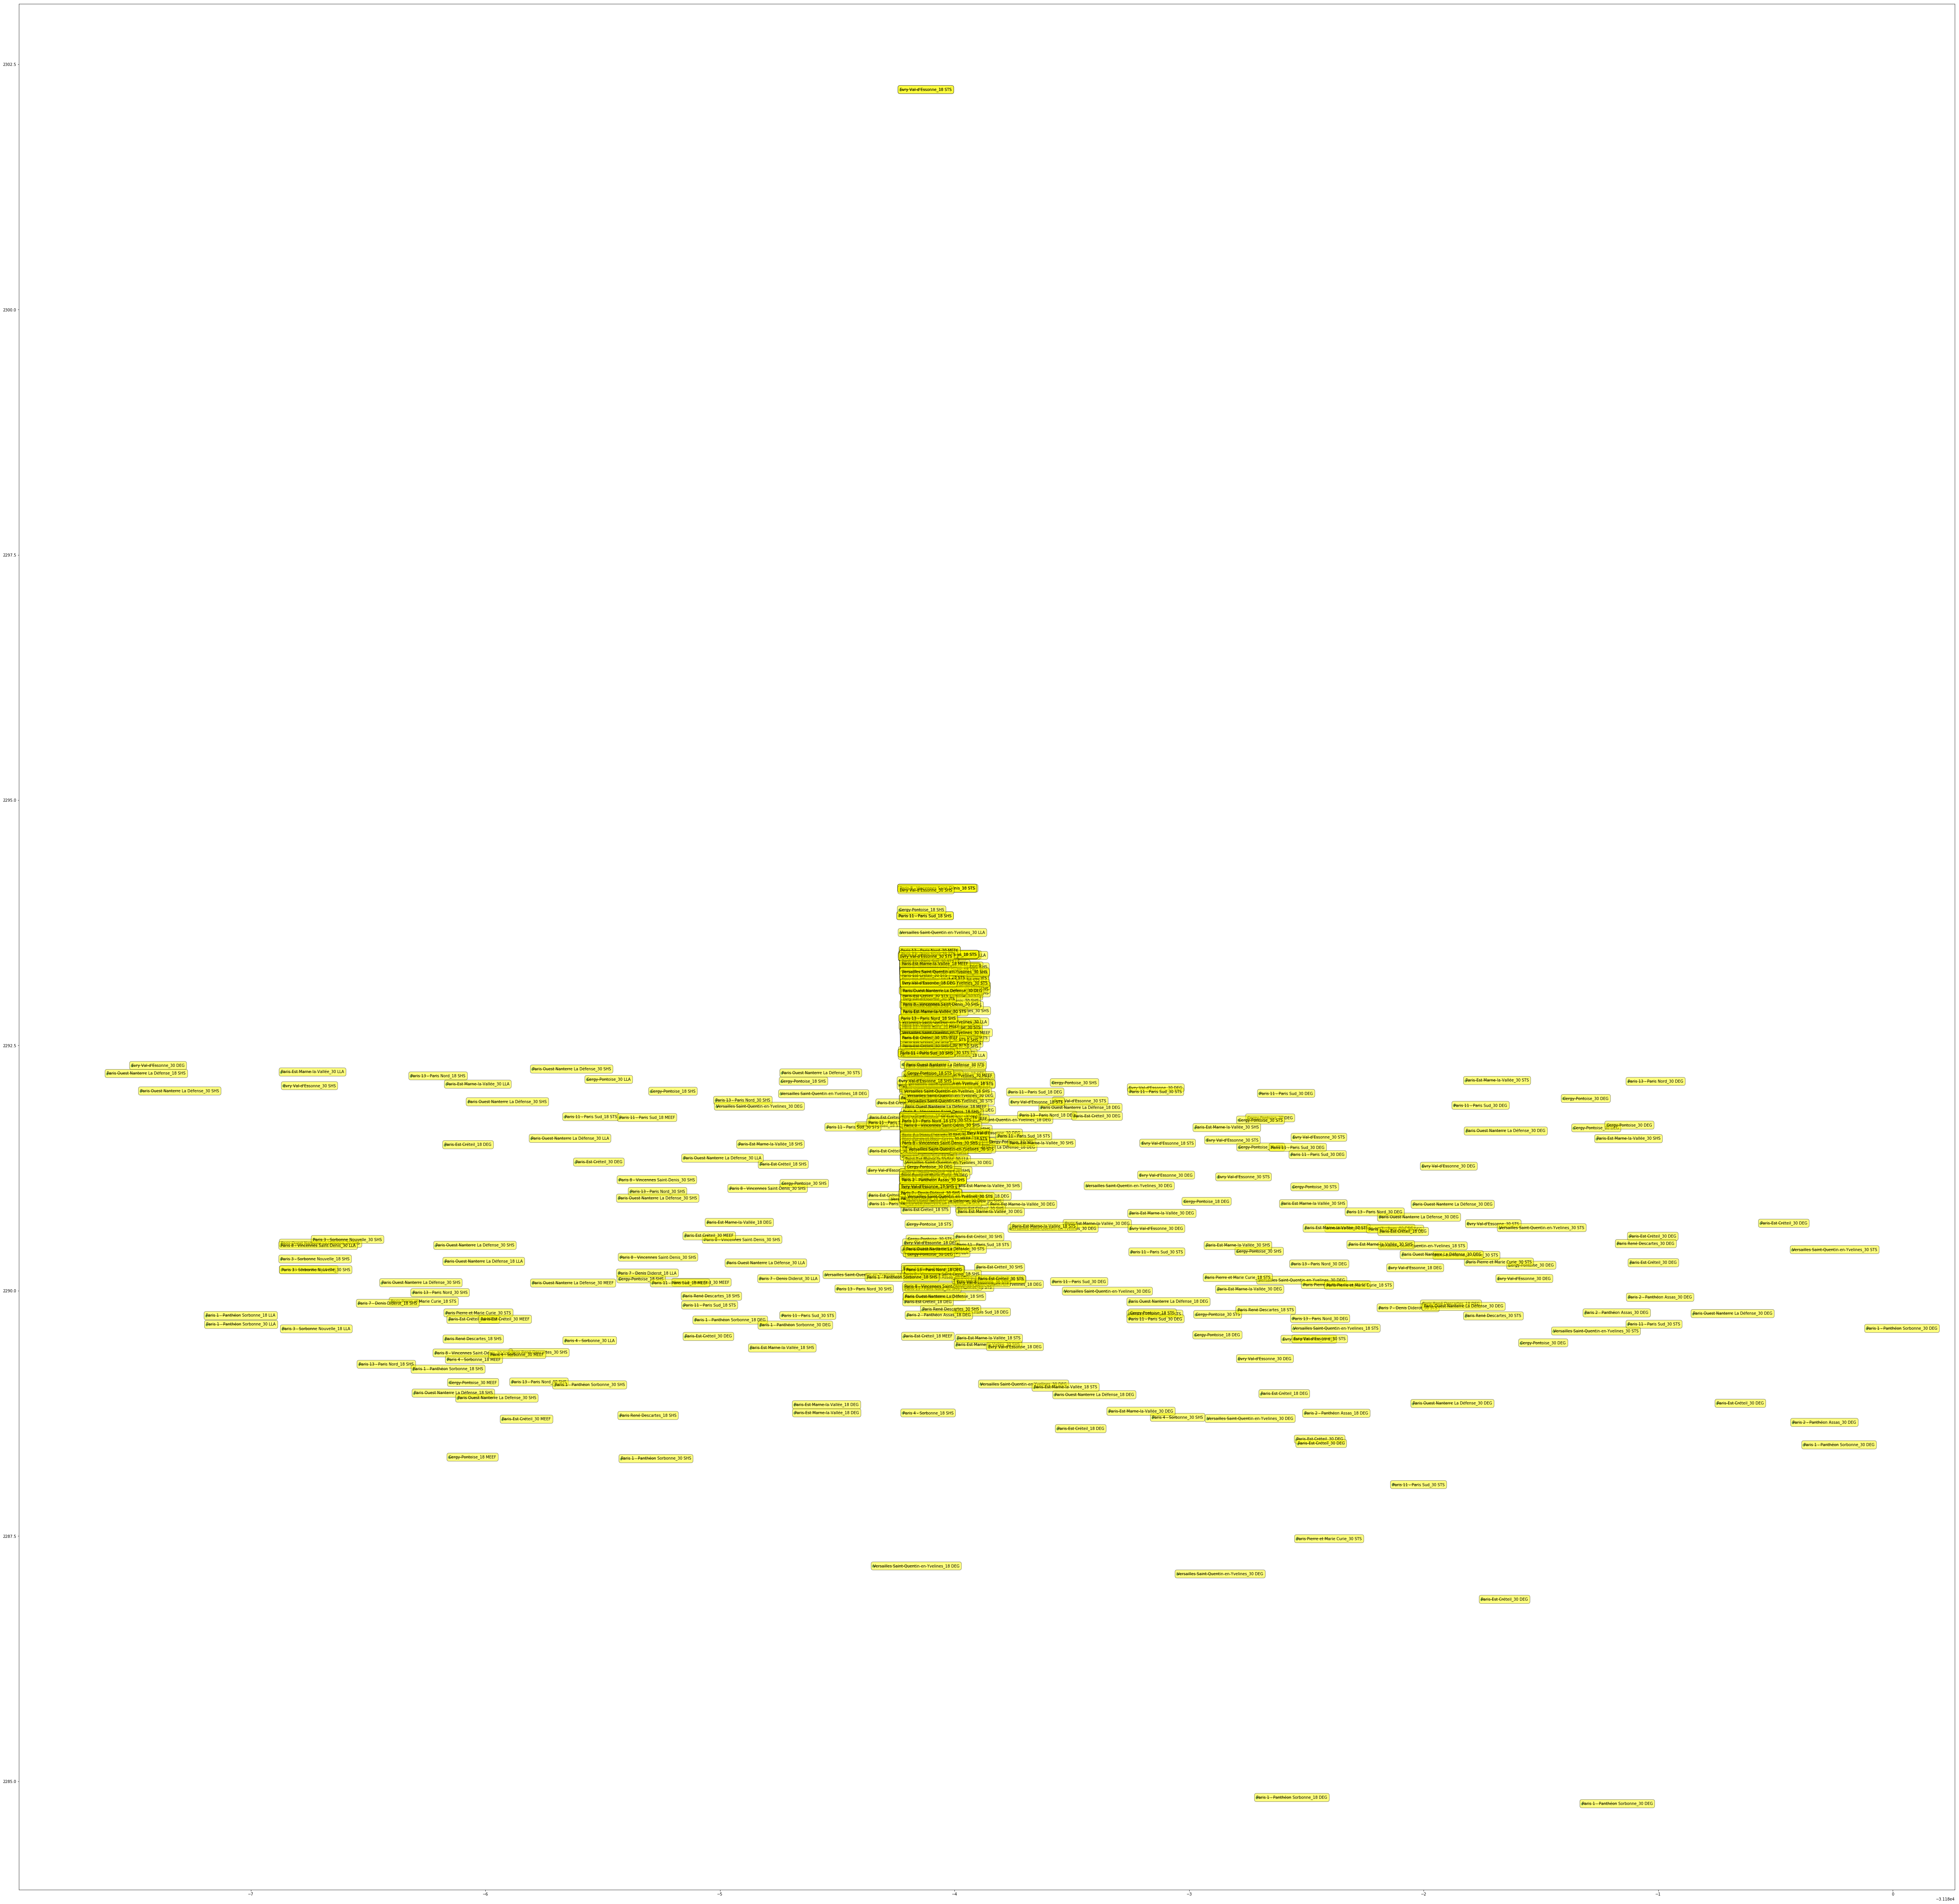

In [119]:
t.repr_obs_plan()

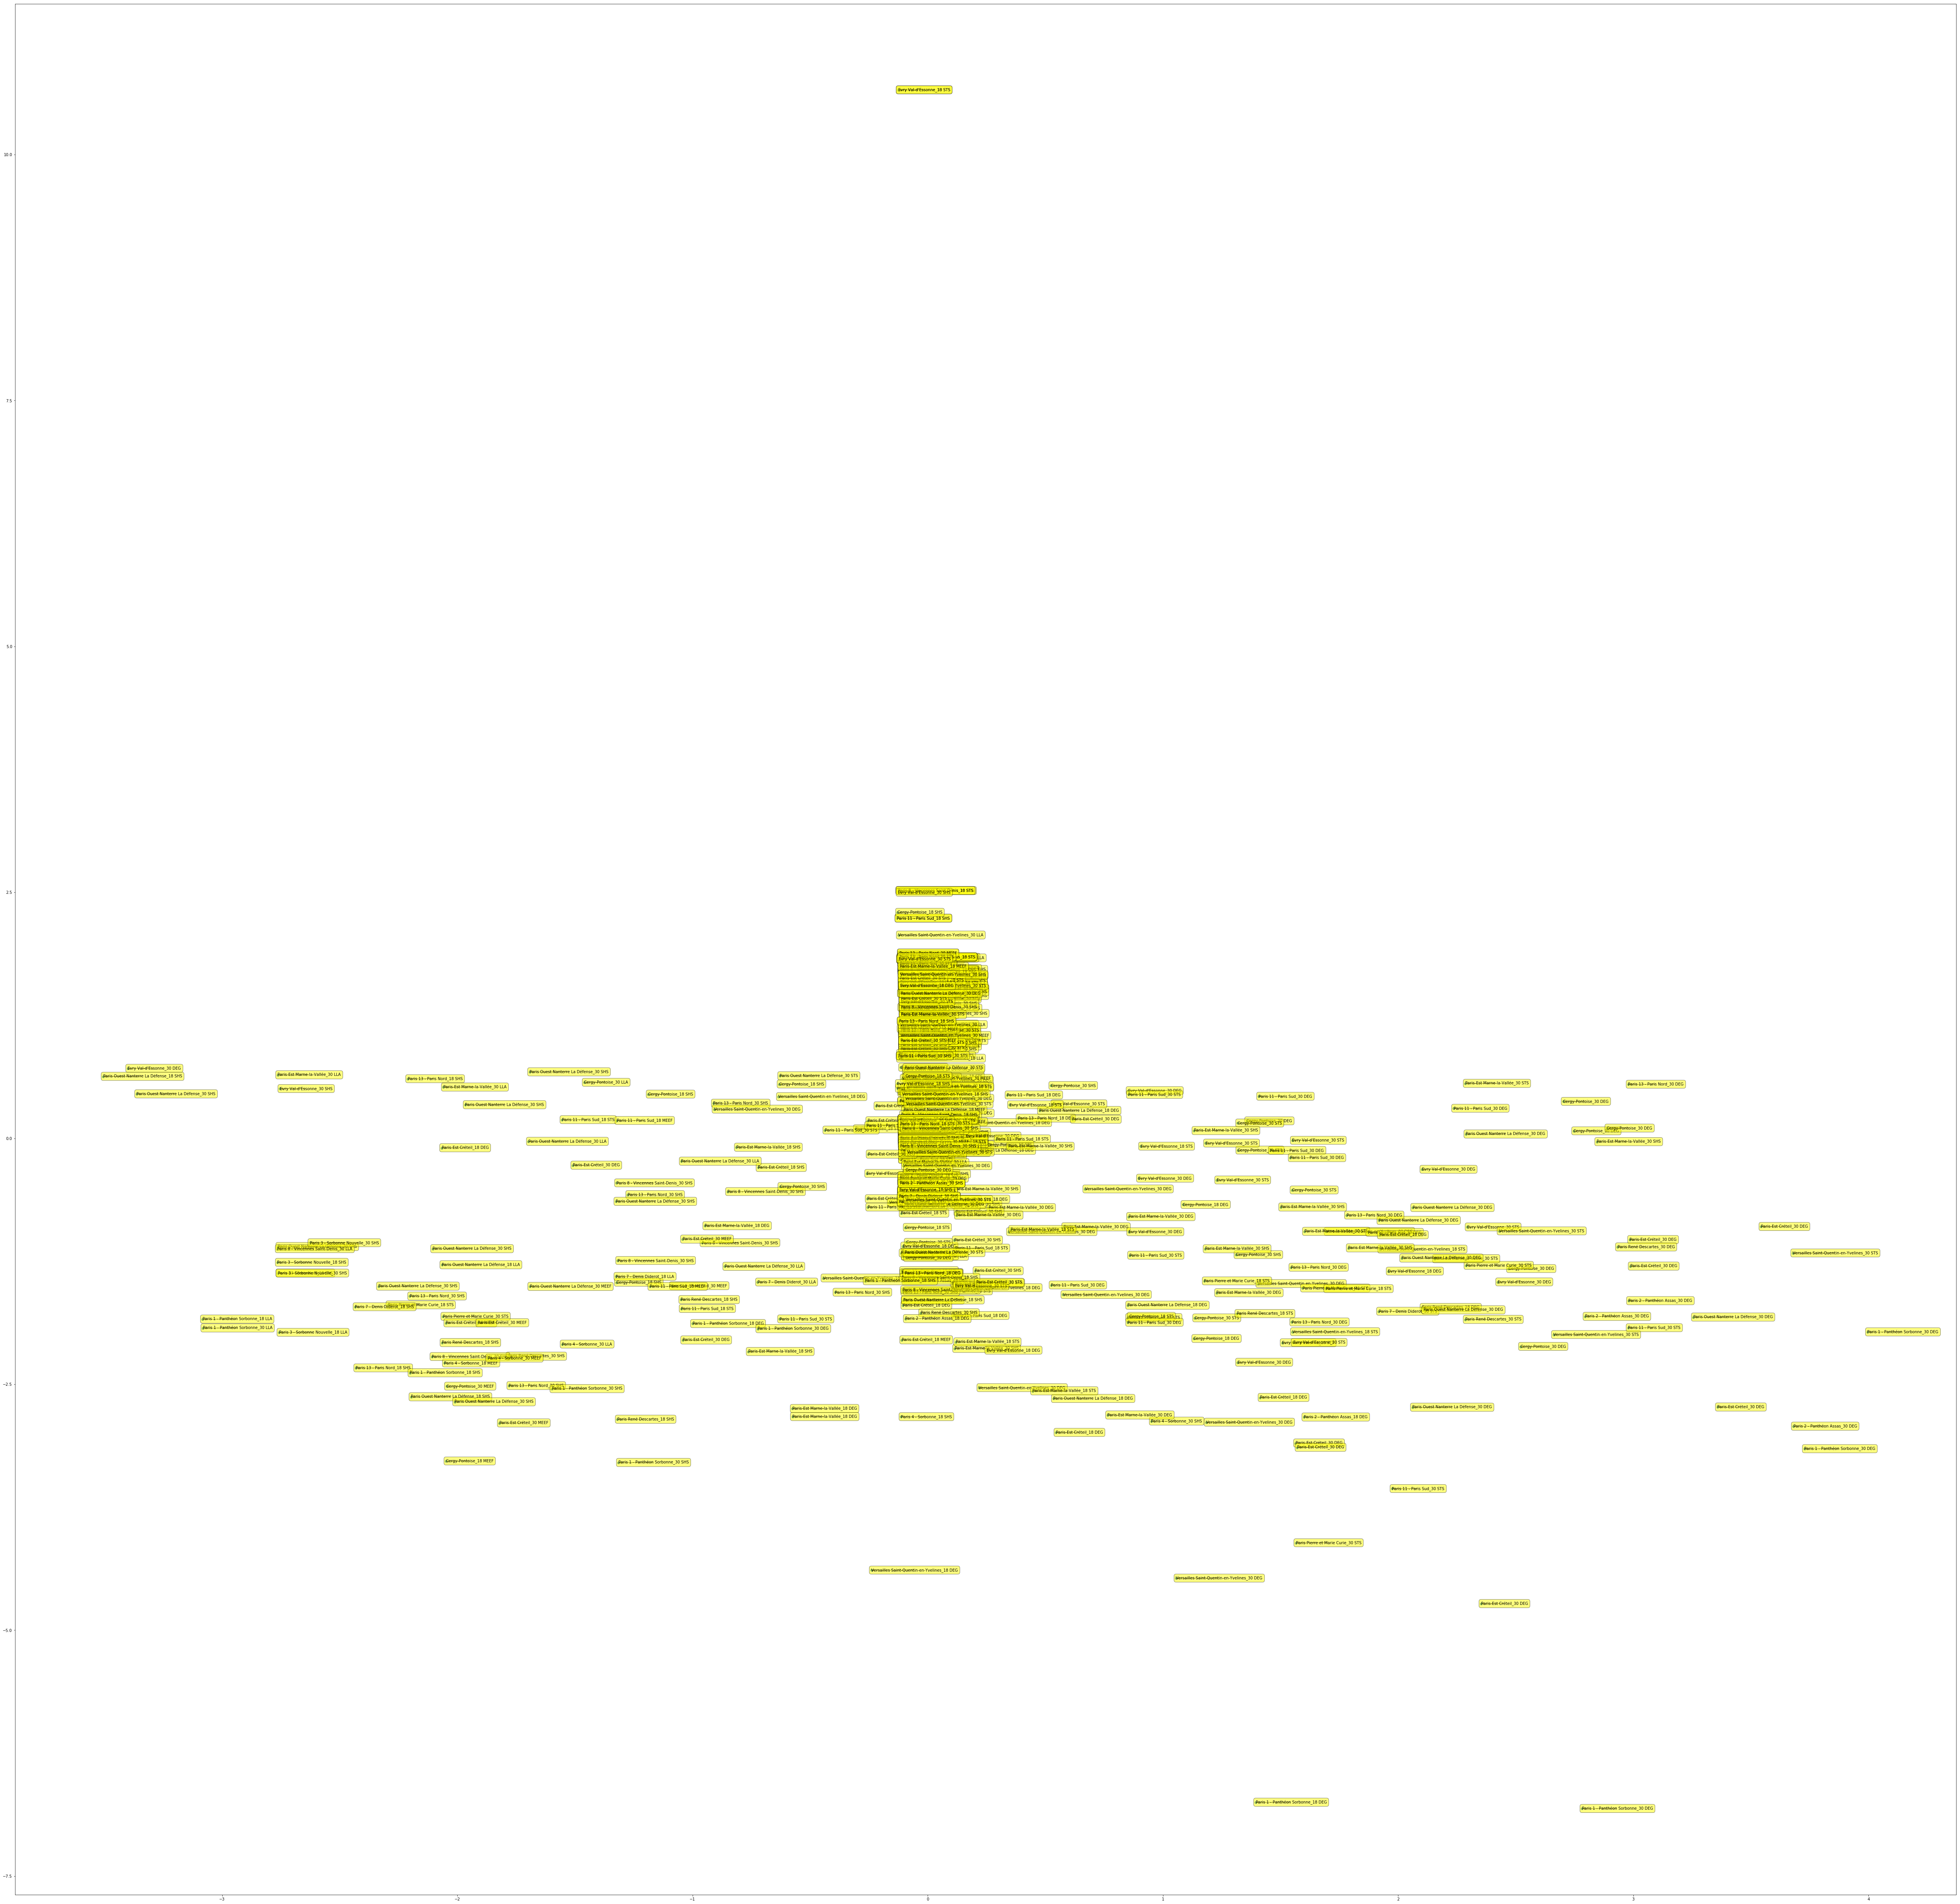

In [81]:
#represention des individu
# on voit que deux vac qui sont proches ont les mêmes caratéristique dans notre base de données
repr_obs_plan(X_train1)

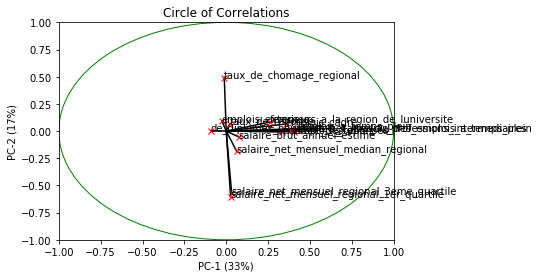

In [122]:
#cercle de corréltion
t1,t2 = t.myPCA()
circleOfCorrelations(t1,t2)

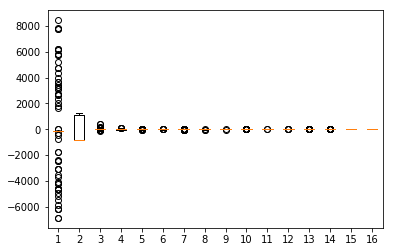

In [42]:
#def boit_npre_comp(A):
#        c=pca.fit(A).transform(A)
#        plt.boxplot(c[:,0:20])
        
        
t.boit_npre_comp()

# visualisation

(array([ 152.,   13.,  388.,   24.,   44.,   65.,   83.,   91.,   70.,   46.]),
 array([  0. ,   9.5,  19. ,  28.5,  38. ,  47.5,  57. ,  66.5,  76. ,
         85.5,  95. ]),
 <a list of 10 Patch objects>)

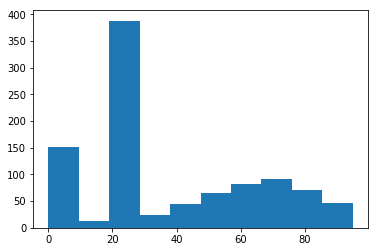

In [40]:
plt.hist(np.array(tab['femmes']))


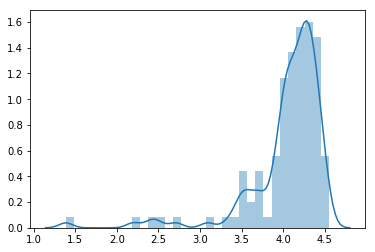

In [207]:
sns.distplot(np.log(np.array(tab['femmes'])))
plt.figure()

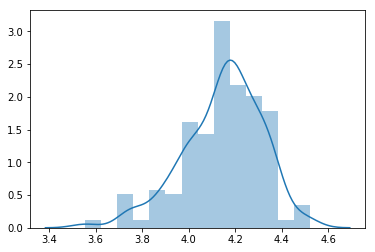

In [211]:
sns.distplot(np.log(np.array(tab['taux_de_reponse'])))
plt.figure()

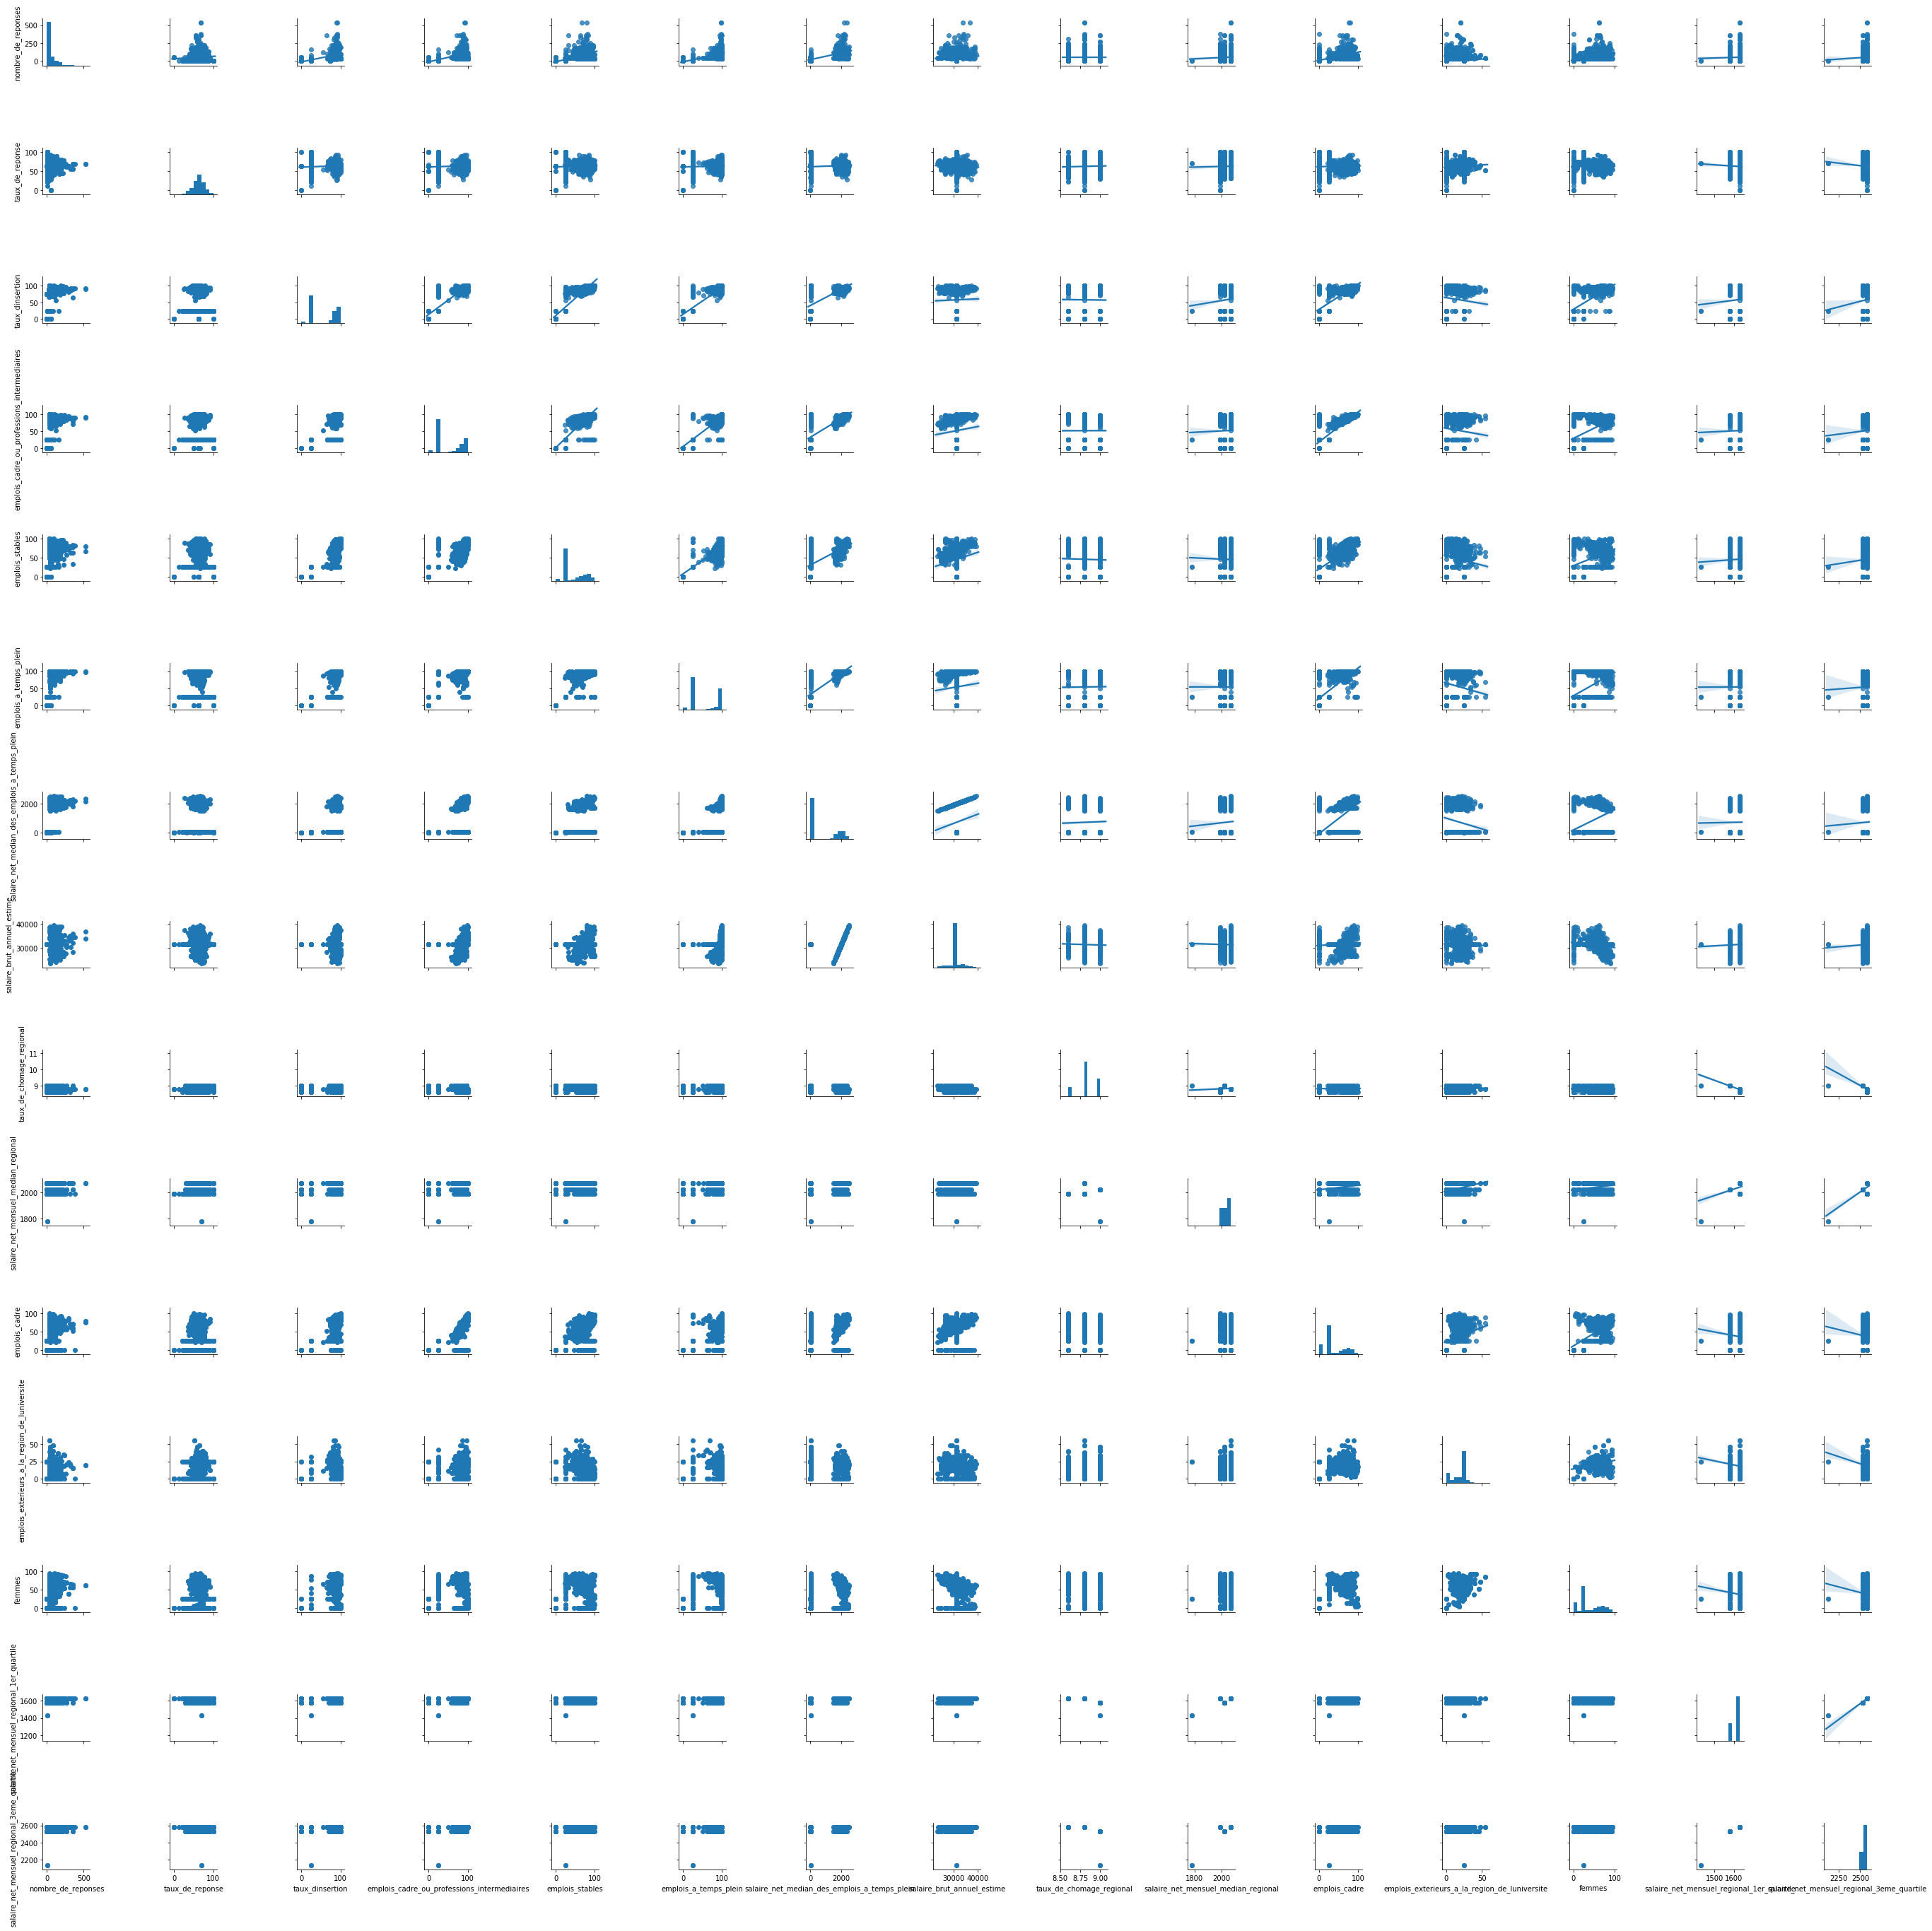

In [22]:
g = sns.PairGrid(tab)
g.map_upper(sns.regplot) 
g.map_lower(plt.scatter)
g.map_diag(plt.hist)  
plt.show()

In [27]:
tab.columns

Index(['nombre_de_reponses', 'taux_de_reponse', 'taux_dinsertion',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'taux_de_chomage_regional',
       'salaire_net_mensuel_median_regional', 'emplois_cadre',
       'emplois_exterieurs_a_la_region_de_luniversite', 'femmes',
       'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile'],
      dtype='object')

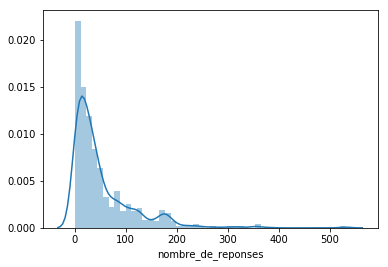

In [31]:
sns.distplot(tab.nombre_de_reponses)

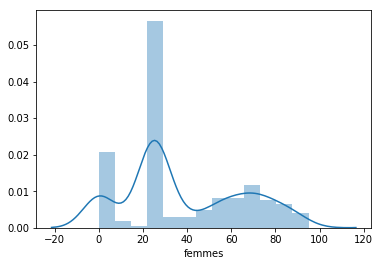

In [35]:
sns.distplot(tab.femmes)

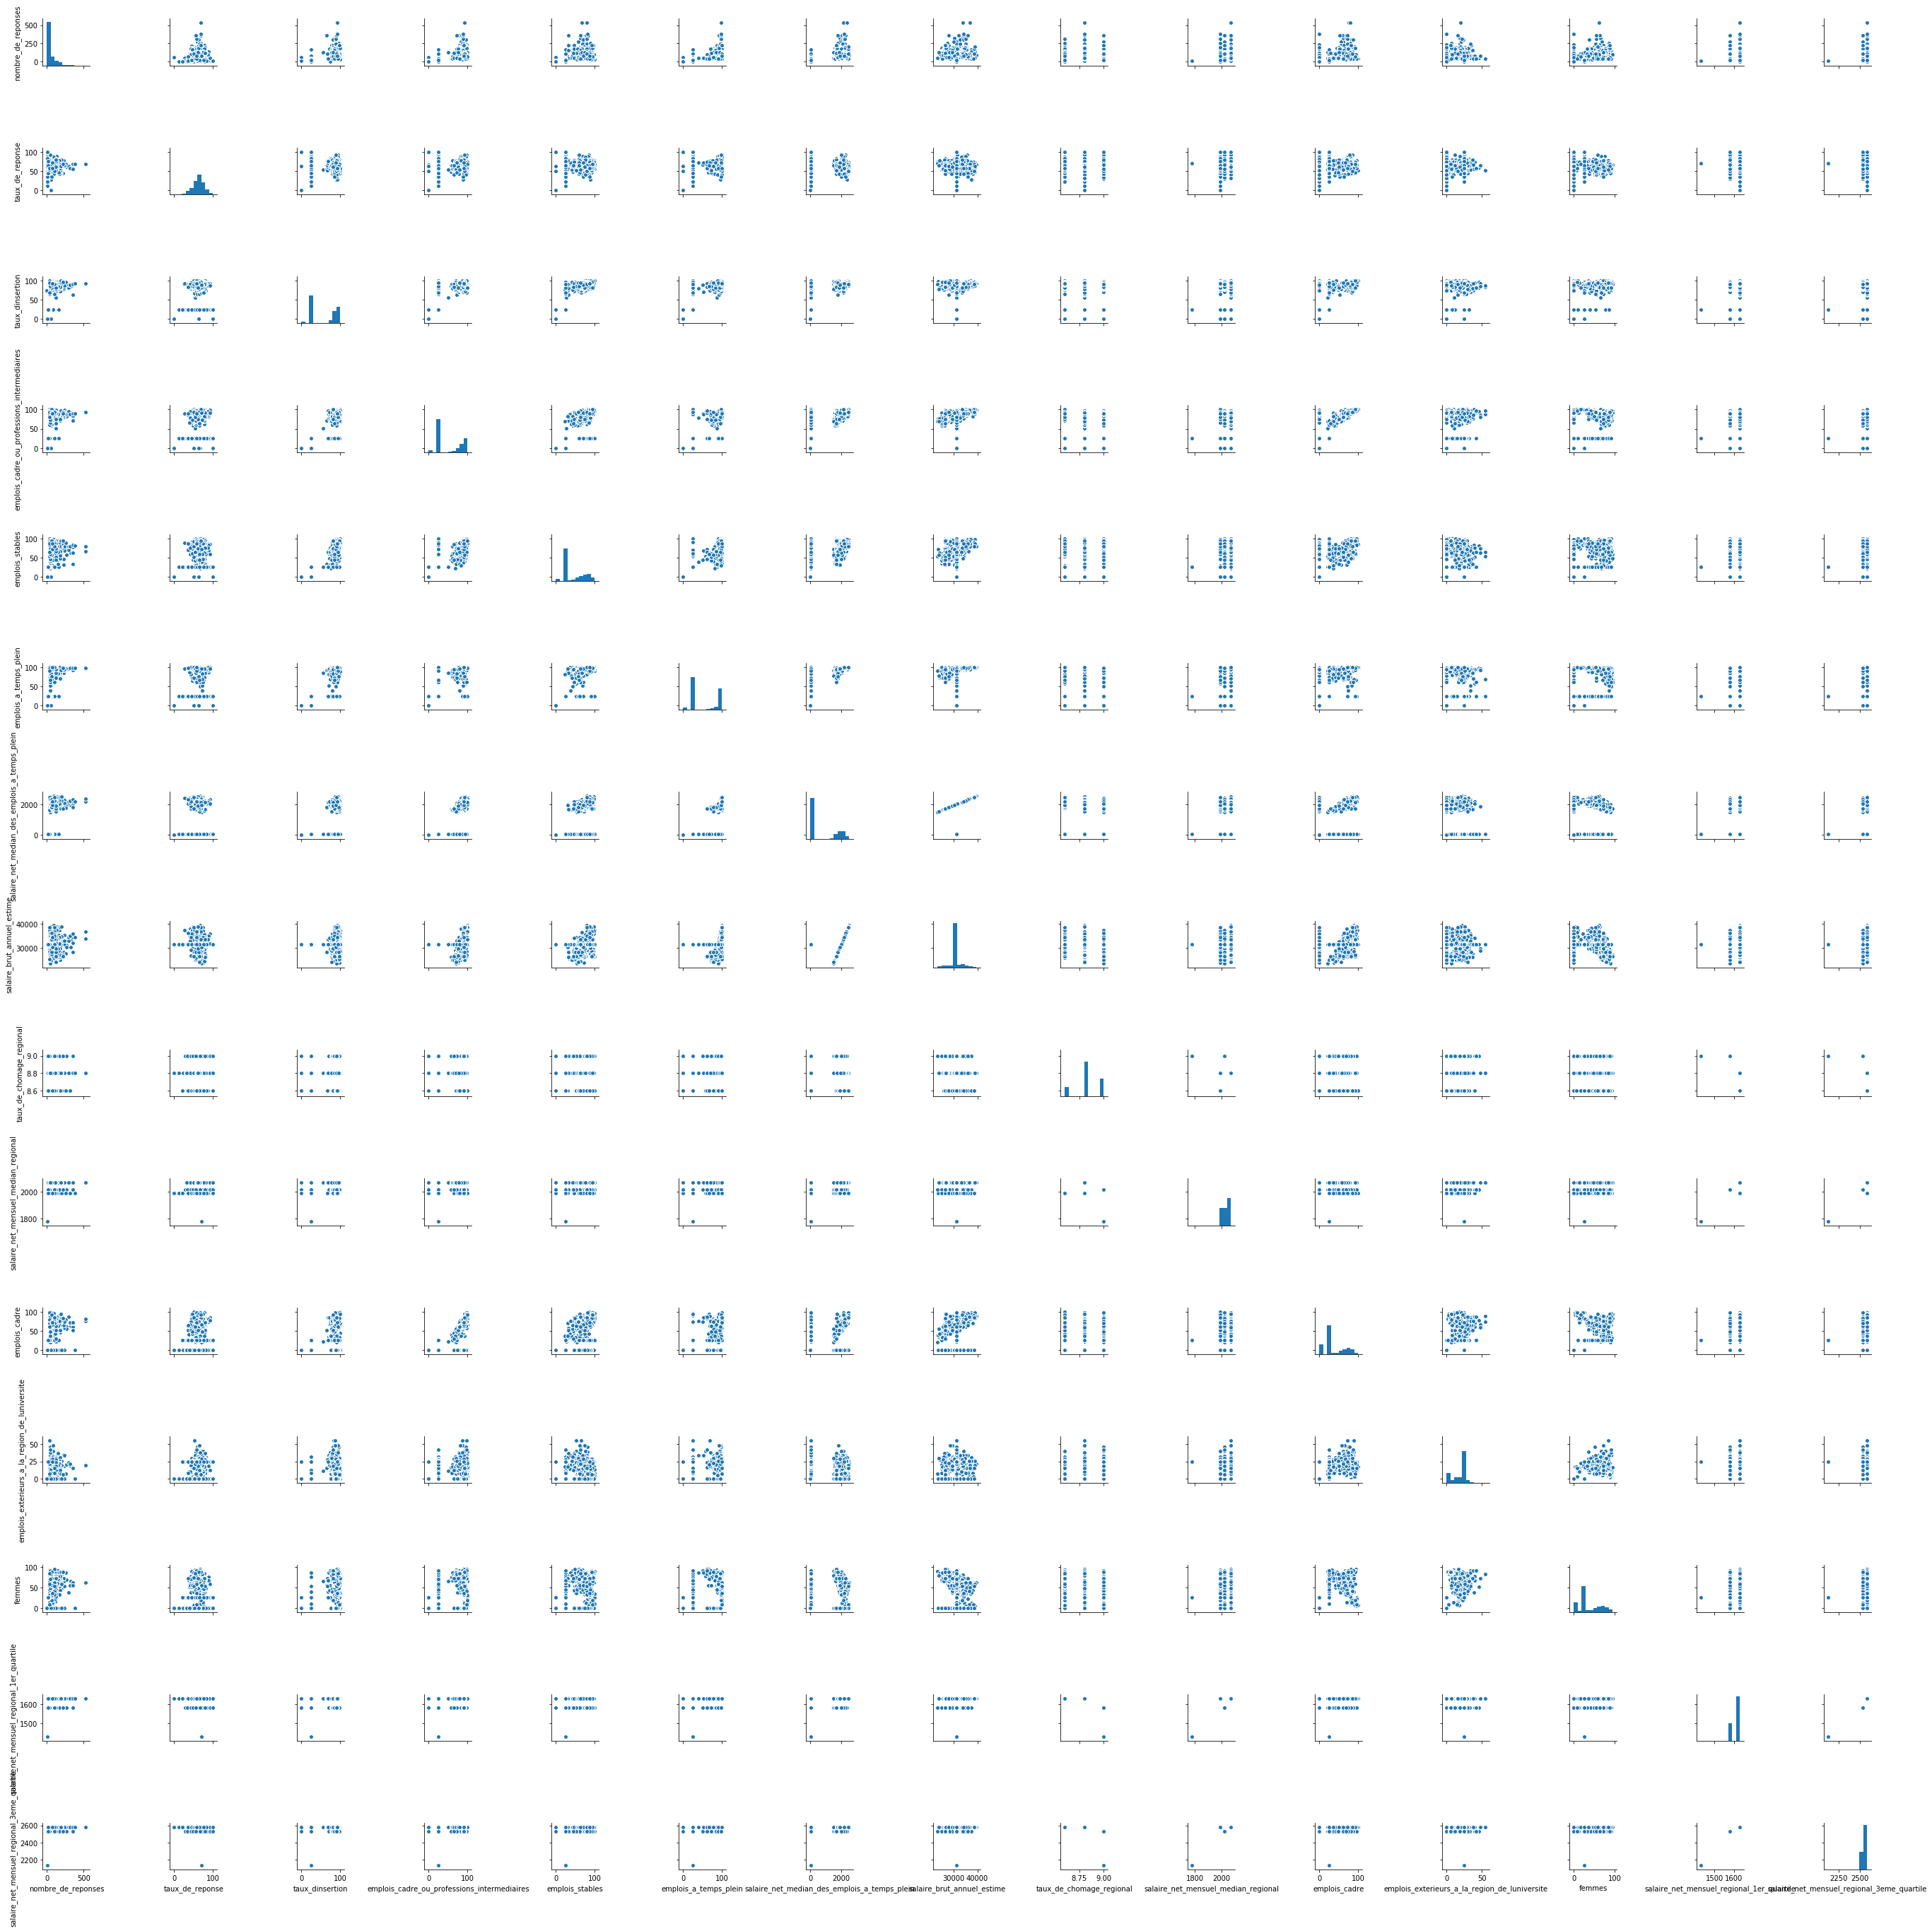

In [32]:
sns.pairplot(tab)

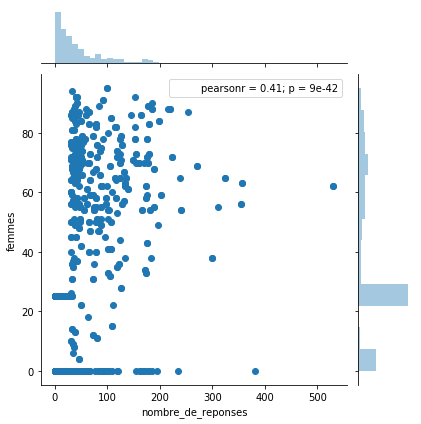

In [33]:
sns.jointplot(x="nombre_de_reponses", y="femmes", data=tab)

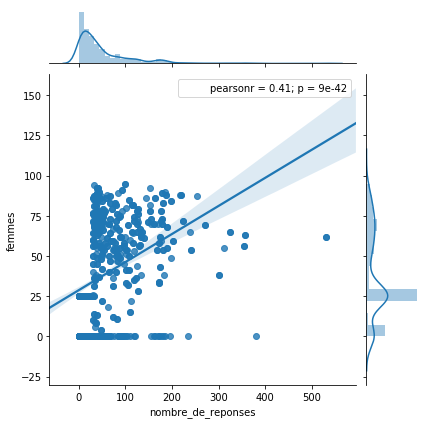

In [34]:
sns.jointplot("nombre_de_reponses", "femmes", data=tab,kind="reg")

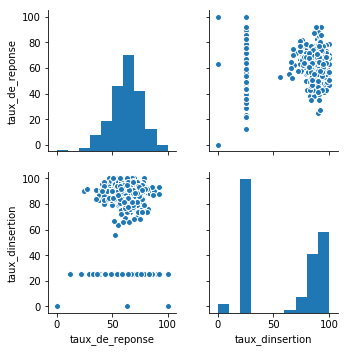

In [87]:
sns.pairplot(tab,vars=[ 'taux_de_reponse', 'taux_dinsertion',])